# Comparison between the ages (after controlling for type and gender)

Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w?
- Are they the same? Is there a gradient?

Age effect - General Questions

- What are the differences between the ages?
- Which genes and pathways are differentially expressed between 8w and 52w, between 52w and 104w, between 8w and 104w? Are they the same? Is there a gradient?
- Are they different for the two genders?
- Are they different for the two types?

# Loads

## Libraries and functions

In [1]:
source("load_libraries.R")

Warning message in is.na(x[[i]]):
“is.na() applied to non-(list or vector) of type 'environment'”Warning message in rsqlite_fetch(res@ptr, n = n):
“Don't need to call dbFetch() for statements, only for queries”

*
*  Package WGCNA 1.63 loaded.
*
*    Important note: It appears that your system supports multi-threading,
*    but it is not enabled within WGCNA in R. 
*    To allow multi-threading within WGCNA with all available cores, use 
*
*          allowWGCNAThreads()
*
*    within R. Use disableWGCNAThreads() to disable threading if necessary.
*    Alternatively, set the following environment variable on your system:
*
*          ALLOW_WGCNA_THREADS=<number_of_processors>
*
*    for example 
*
*          ALLOW_WGCNA_THREADS=4
*
*    To set the environment variable in linux bash shell, type 
*
*           export ALLOW_WGCNA_THREADS=4
*
*     before running R. Other operating systems or shells will
*     have a similar command to achieve the same aim.
*


Allowing multi-threading with up to 4 threads.
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "preparing IC data..."
[1] "preparing gene to GO mapping data..."
[1] "prepar

In [2]:
source("functions.R")

## Data

In [3]:
load("../results/dge/gene_length.RData")
load("../results/dge/metadata.RData")
load("../results/dge/norm_counts.RData")
load("../results/dge/dge.RData")

In [4]:
load("../results/dge/dge_net.RData")
load("../results/dge/dge_layout.RData")
load("../results/dge/dge_net_connected_gene_colors.RData")
load("../results/dge/dge_net_pal2.RData")

In [5]:
module_nb = length(unique(connected_gene_colors))
pal2 = c(pal2, "white", "black")

In [6]:
# Comparison between the ages (after controlling for type and gender)
global_52w_8w = results(dge, contrast= c(0,0,0,0,1,0,1/2,0,0,1/2), alpha=0.05, test="Wald")
global_104w_8w = results(dge, contrast= c(0,0,0,1,0,1/2,0,0,1/2,0), alpha=0.05, test="Wald")
global_104w_52w = results(dge, contrast= c(0,0,0,1,-1,1/2,-1/2,0,1/2,-1/2), alpha=0.05, test="Wald")

In [7]:
samples = c(
    'SPF_8w_F_1_2','SPF_8w_F_3_2','SPF_8w_F_4_2','SPF_8w_F_5_2','GF_8w_F_1_2','GF_8w_F_2_2','GF_8w_F_3_2','GF_8w_F_4_2','GF_8w_F_5_2','SPF_8w_M_1_2','SPF_8w_M_2_2','SPF_8w_M_3_2','SPF_8w_M_4_2','GF_8w_M_1_2','GF_8w_M_2_2','GF_8w_M_3_2','GF_8w_M_4_2',
    'SPF_52w_F_1_2','SPF_52w_F_2_2','SPF_52w_F_3_2','SPF_52w_F_4_2','SPF_52w_F_5_2','SPF_52w_F_6_2','GF_52w_F_1_2','GF_52w_F_2_2','GF_52w_F_3_2','GF_52w_F_4_2','GF_52w_F_5_2','GF_52w_F_6_2','SPF_52w_M_1_2','SPF_52w_M_2_2','SPF_52w_M_3_2','SPF_52w_M_4_2','SPF_52w_M_5_2','GF_52w_M_1_2','GF_52w_M_2_2','GF_52w_M_3_2','GF_52w_M_4_2',
    'SPF_104w_F_1_2','SPF_104w_F_2_2','SPF_104w_F_3_2','GF_104w_F_1_2','GF_104w_F_2_2','GF_104w_F_3_2','SPF_104w_M_1_2','SPF_104w_M_2_2','SPF_104w_M_3_2','SPF_104w_M_4_2','SPF_104w_M_5_2','SPF_104w_M_6_2','SPF_104w_M_7_2','SPF_104w_M_8_2','SPF_104w_M_9_2','SPF_104w_M_10_2','SPF_104w_M_11_2','SPF_104w_M_12_2','SPF_104w_M_13_2','SPF_104w_M_14_2','GF_104w_M_1_2','GF_104w_M_2_2')

In [8]:
annot = as.data.frame(colData(dge)[, c("age", "gender", "type")])
to_comp = c("52w VS 8w", "104w VS 52w", "104w VS 8w")

# Differentially expressed genes

In [9]:
age_data = list(global_52w_8w, global_104w_52w, global_104w_8w)
names(age_data) = to_comp
age_deg = extract_diff_expr_genes(age_data, "age-effect/age/")

Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in pcls(G):
“initial point very close to some inequality constraints”Warning message in stack.default(getgo(rownames(l$sign_fc_deg), "mm10", "geneSymbol")):
“non-vector elements will be ignored”Warning message in stack.default(getgo(rownames(as.data.frame(l$deg)), "mm10", "geneSymbol", :
“non-vector elements will be ignored”

# Stats

,All DEG (Wald padj < 0.05),All over-expressed genes (Wald padj < 0.05 & FC > 0),All under-expressed genes (Wald padj < 0.05 & FC < 0),DEG (Wald padj < 0.05 & abs(FC) >= 1.5),Over-expressed genes (Wald padj < 0.05 & FC >= 1.5),Under-expressed genes (Wald padj < 0.05 & FC <= -1.5)
52w VS 8w,2008,1107,901,631,485,146
104w VS 52w,2043,1168,875,526,258,268
104w VS 8w,3682,1975,1707,1357,788,569


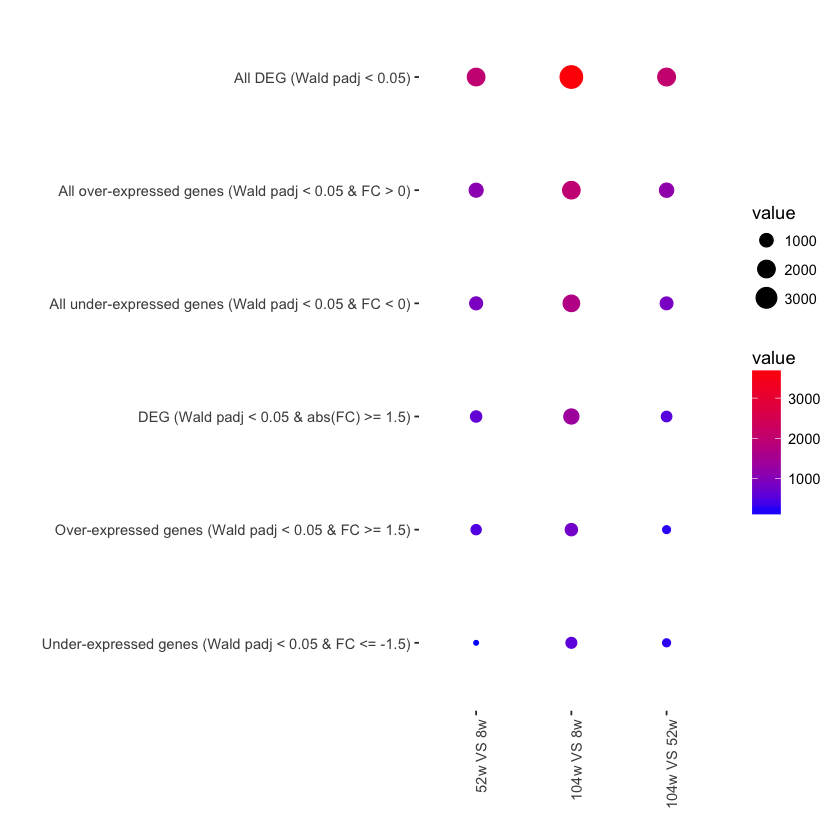

In [10]:
age_deg$stat
plot_stat_mat(age_deg$stat)

## All DEG (Wald padj < 0.05)

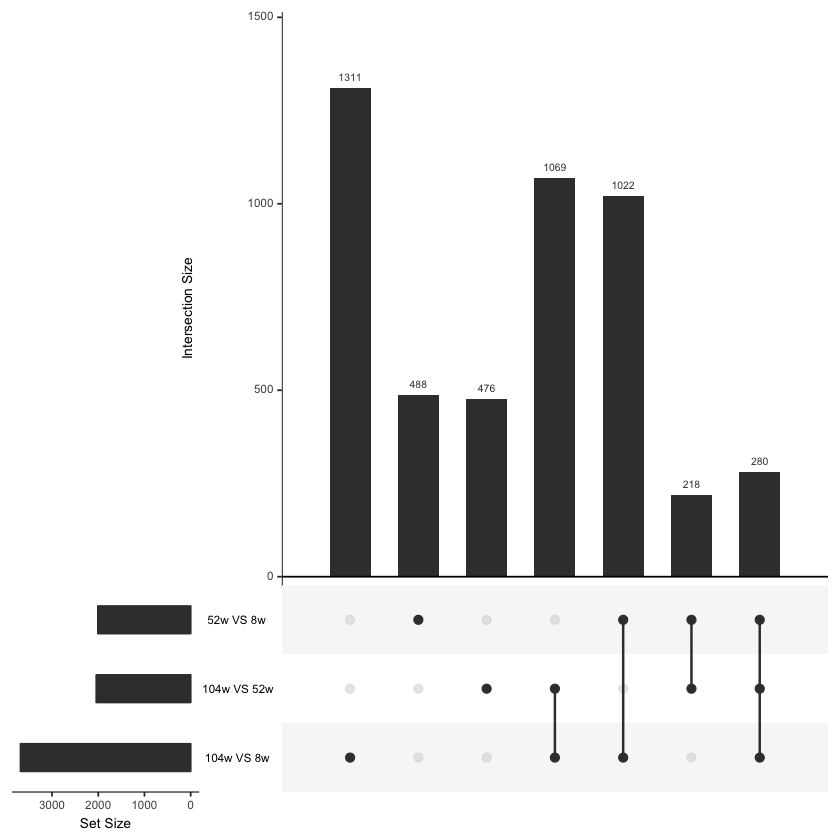

In [11]:
# Differentially expressed genes
upset(as.data.frame(age_deg$deg),nsets = 6)

## DEG (Wald padj < 0.05 & abs(FC) > 1.5)

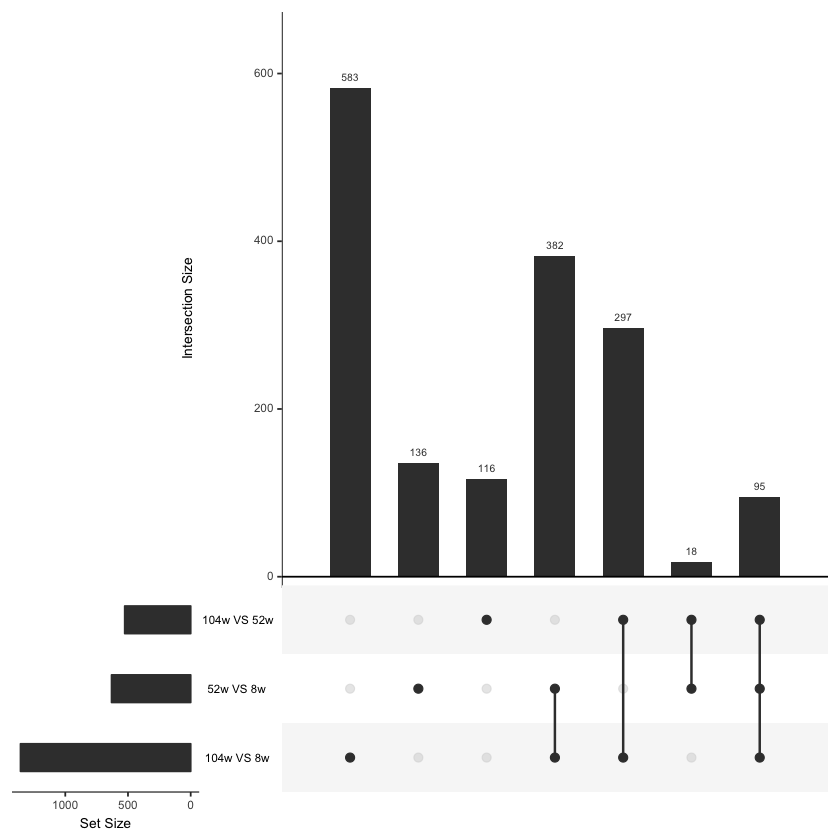

In [12]:
upset(as.data.frame(1*(!is.na(age_deg$sign_fc_deg))),nsets = 6)

# Log2FC for DEG (Wald padj < 0.05 & abs(FC) > 1.5)

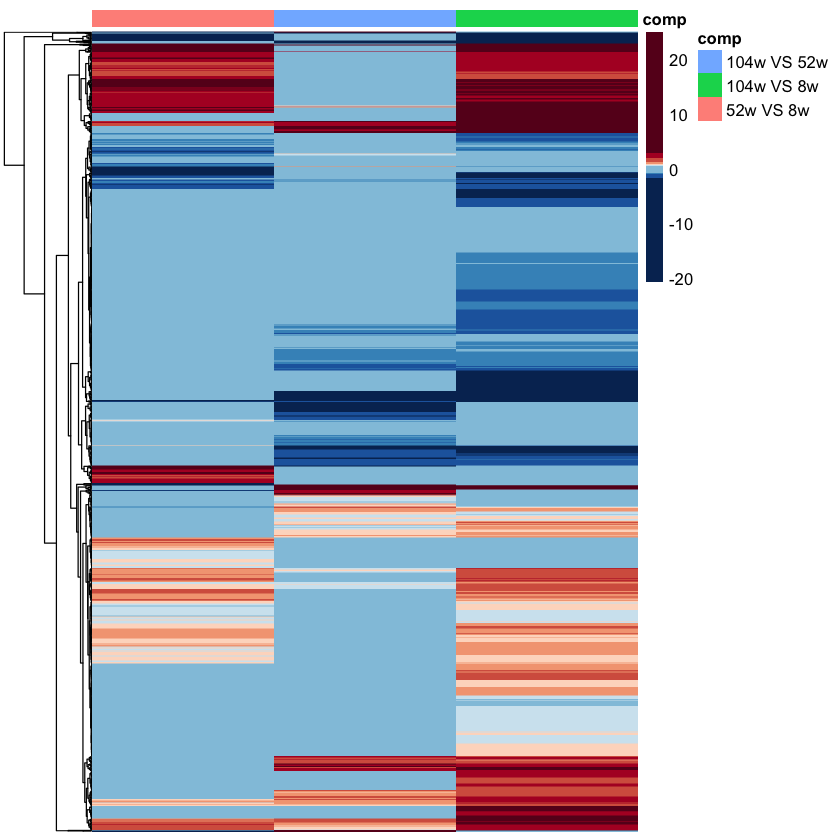

In [13]:
fc_annot = data.frame(comp = c("52w VS 8w", "104w VS 52w", "104w VS 8w"))
rownames(fc_annot) = colnames(age_deg$sign_fc_deg)
plot_fc_heatmap(age_deg$sign_fc_deg, fc_annot)

# Counts

Genes that are differentially expressed in 52W vs 8W with abs(FC) > 2

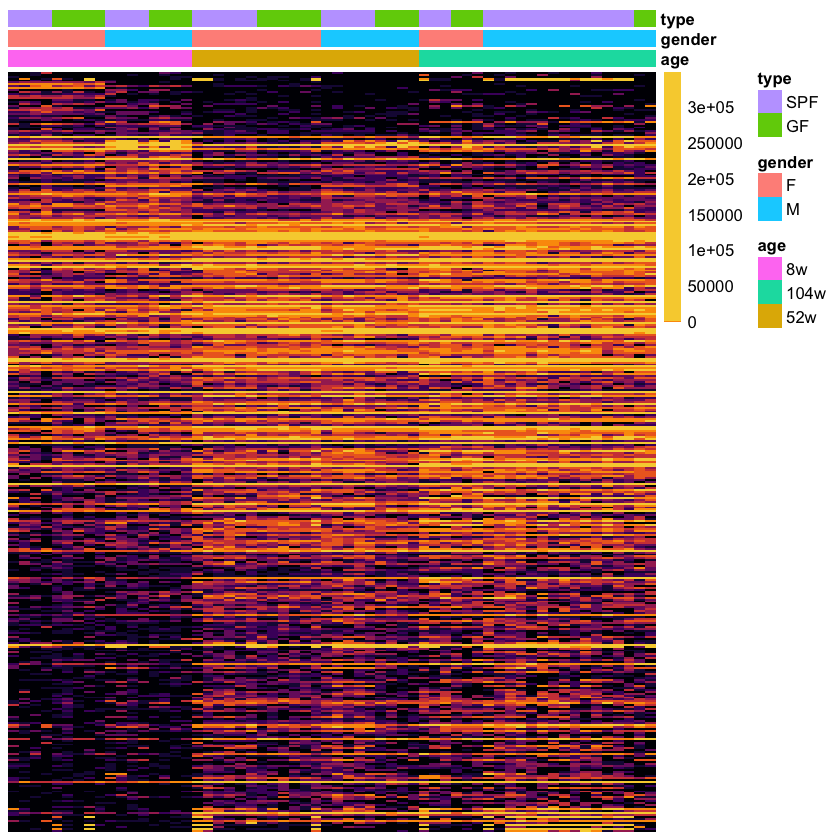

In [14]:
# 52w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>1),1])))
plot_count_heatmap(genes,samples, annot)

Genes that are differentially expressed in 104W vs 8W with abs(FC) > 2

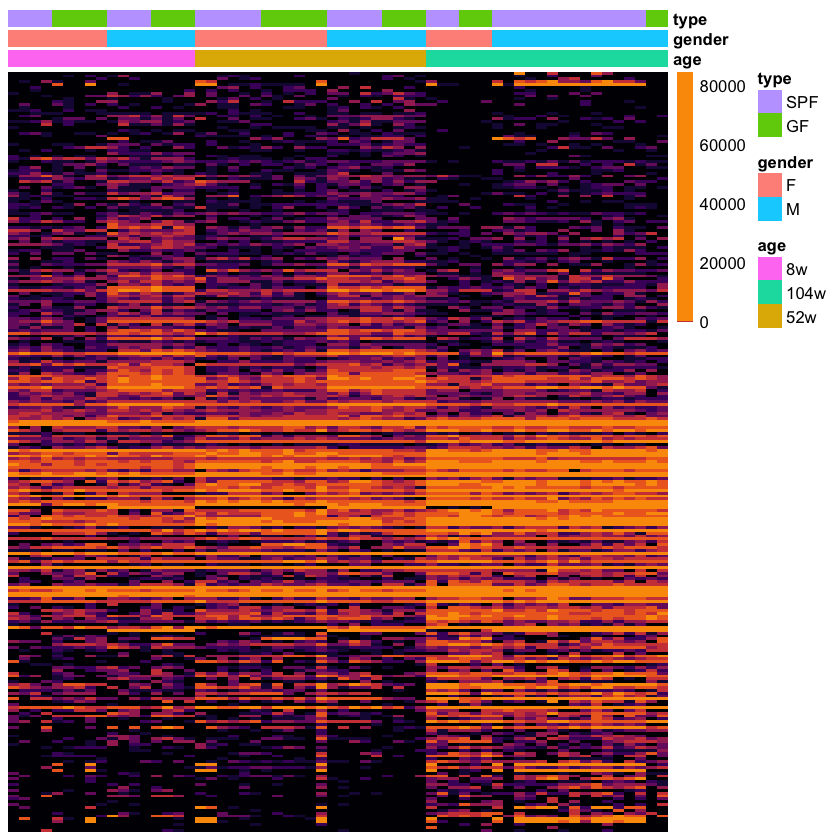

In [15]:
# 104w != 8w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,2])>1),2])))
plot_count_heatmap(genes,samples, annot)

Genes that are differentially expressed in 104W vs 52W with abs(FC) > 2

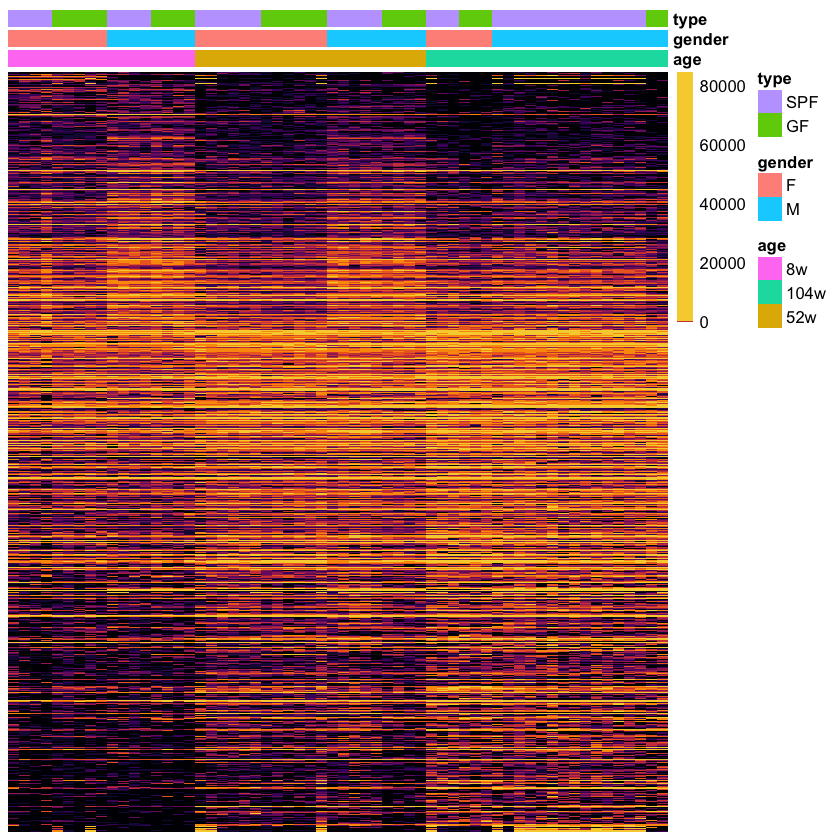

In [16]:
# 104w != 52w with abs(FC) > 2
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,3])>1),3])))
plot_count_heatmap(genes,samples, annot)

# Compare the numbers

Differentially expressed genes

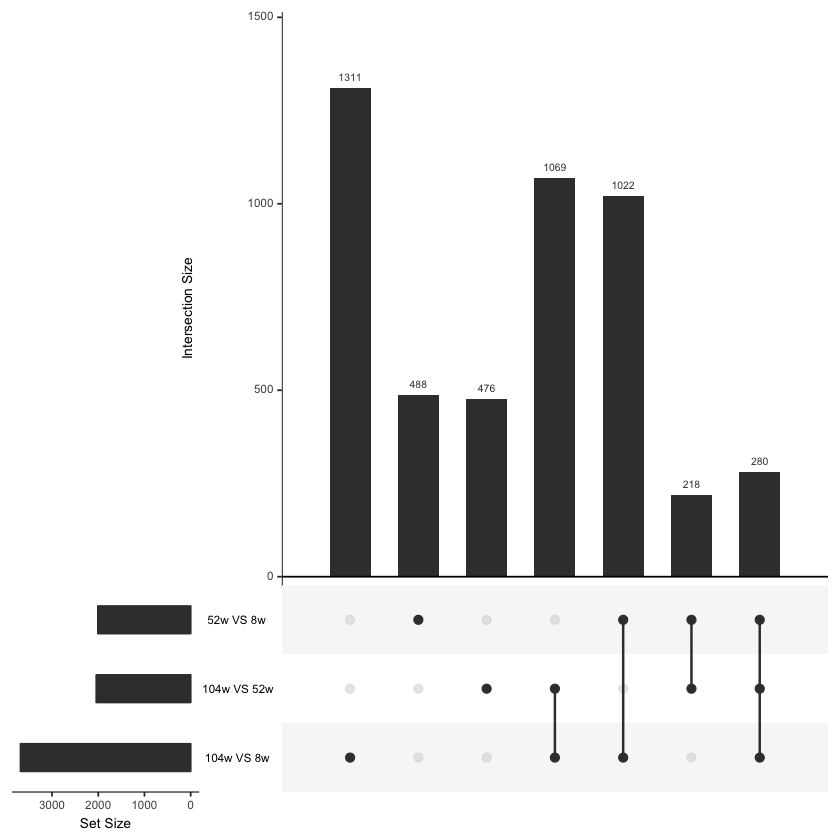

In [17]:
# Differentially expressed genes
upset(as.data.frame(age_deg$deg))

# Compare the intersections in term of expressions

## Genes that are differentially expressed in 52W vs 8W and in 104W vs 8W (and not in 104w vs 52w)

In [18]:
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & is.na(age_deg$fc_deg[,3]),c(1,2)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 8w", "52w > 8w & 104w < 8w", "52w < 8w & 104w > 8w", "52w < 8w & 104w < 8w")
rep

52w > 8w & 104w > 8w,52w > 8w & 104w < 8w,52w < 8w & 104w > 8w,52w < 8w & 104w < 8w
0,56,162,0


With abs(FC) > 1

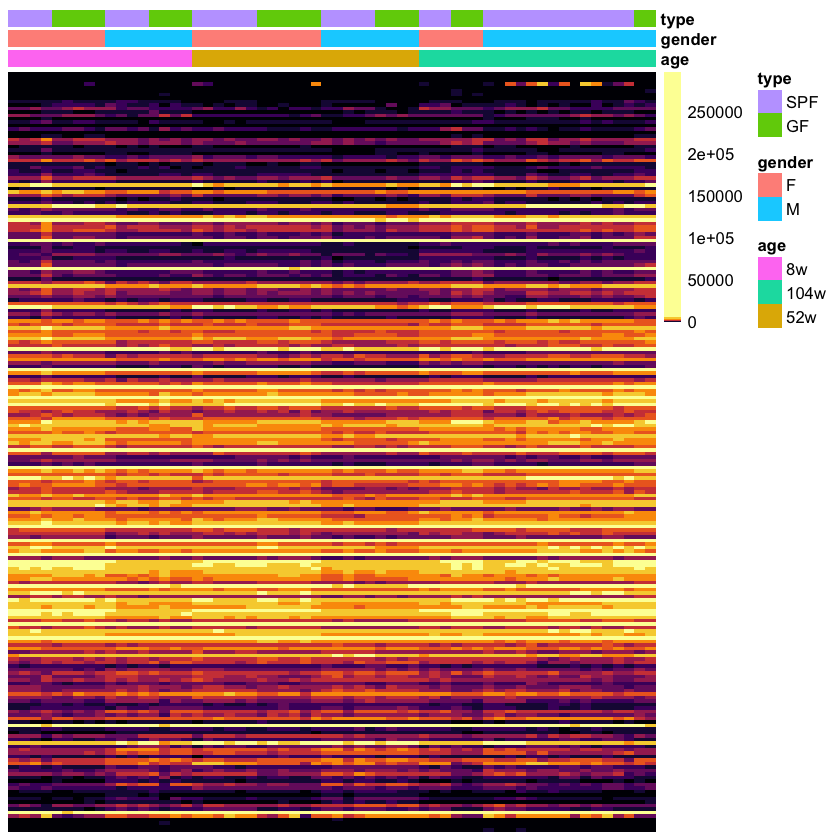

In [19]:
# 52w != 8w and 104w != 8w and 104w == 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & is.na(age_deg$fc_deg[,3])),1])))
plot_count_heatmap(genes,samples, annot)

## Genes that are differentially expressed in 52W vs 8W and in 104W vs 52W (and not in 104w vs 52w)

In [20]:
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,3)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("52w > 8w & 104w > 52w", "52w > 8w & 104w < 52w", "52w < 8w & 104w > 52w", "52w < 8w & 104w < 52w")
rep

52w > 8w & 104w > 52w,52w > 8w & 104w < 52w,52w < 8w & 104w > 52w,52w < 8w & 104w < 52w
613,0,0,409


With abs(FC) > 1

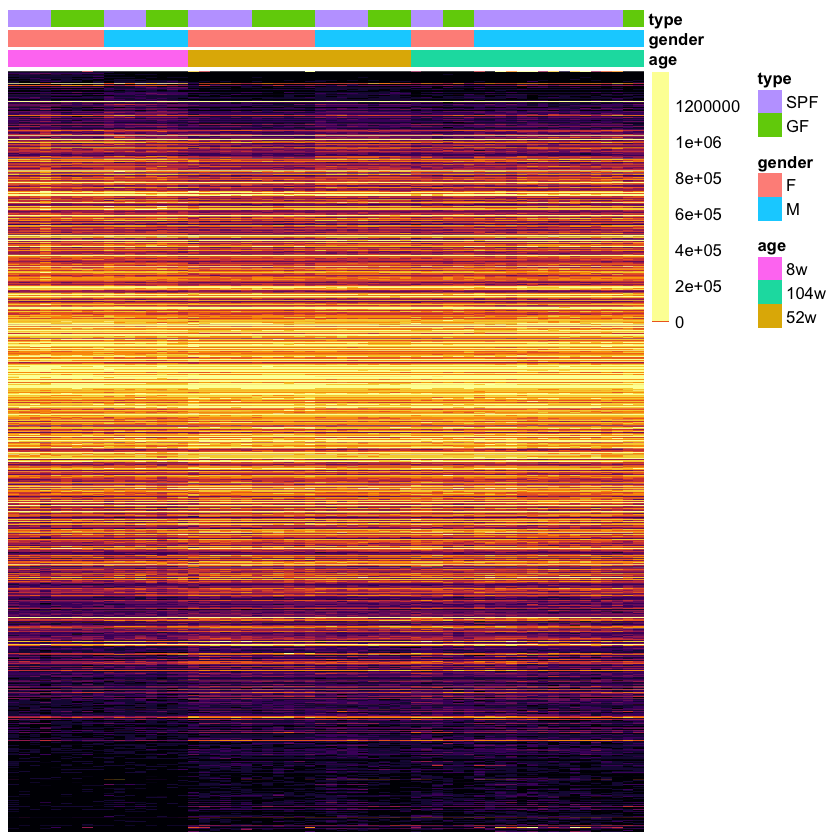

In [21]:
# 52w != 8w and 104w == 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & is.na(age_deg$fc_deg[,2]) & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

## Genes that are differentially expressed in 104W vs 8W and in 104W vs 52W (and not in 52w vs 8w)

In [22]:
# Genes that are differentially expressed in 104W vs 8W and in 104W vs 52W (and not in 52w vs 8w)
fc = age_deg$fc_deg[is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(2,3)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition(fc)
colnames(rep) = c("104w > 8w & 104w > 52w", "104w > 8w & 104w < 52w", "104w < 8w & 104w > 52w", "104w < 8w & 104w < 52w")
rep

104w > 8w & 104w > 52w,104w > 8w & 104w < 52w,104w < 8w & 104w > 52w,104w < 8w & 104w < 52w
534,0,0,535


With abs(FC) > 1

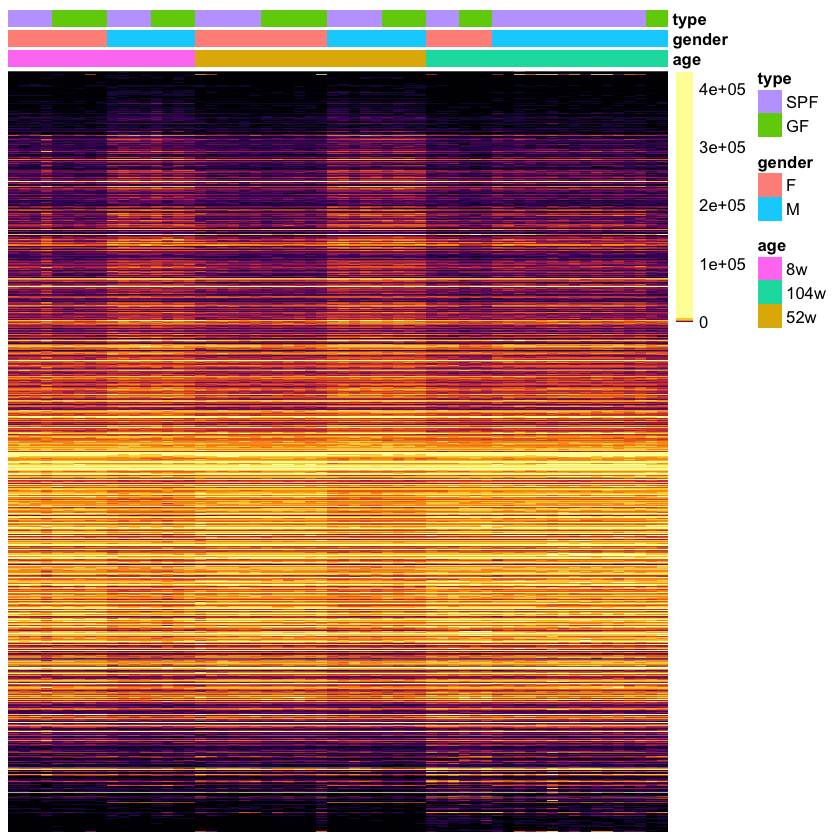

In [23]:
# 52w == 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(is.na(age_deg$fc_deg[,1]) & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),2])))
plot_count_heatmap(genes,samples, annot)

## Genes that are differentially expressed in 52W vs 8W, in 104W vs 8W and in 104W vs 52W

In [24]:
# Genes that are differentially expressed in 52W vs 8W, in 104W vs 8W and in 104W vs 52W
fc = age_deg$fc_deg[!is.na(age_deg$fc_deg[,1]) & !is.na(age_deg$fc_deg[,2]) & !is.na(age_deg$fc_deg[,3]),c(1,2,3)]
#heatmap.2(fc, Colv = NA, scale="column", cexCol=0.5, symbreaks=T)
rep = get_repartition_3col(fc)
colnames(rep) = c(
    "52w > 8w & 104w > 8w & 104w > 52w",
    "52w > 8w & 104w > 8w & 104w < 52w",
    "52w > 8w & 104w < 8w & 104w > 52w",
    "52w > 8w & 104w < 8w & 104w < 52w",
    "52w < 8w & 104w > 8w & 104w > 52w",
    "52w < 8w & 104w > 8w & 104w < 52w",
    "52w < 8w & 104w < 8w & 104w > 52w",
    "52w < 8w & 104w < 8w & 104w < 52w")
rep

52w > 8w & 104w > 8w & 104w > 52w,52w > 8w & 104w > 8w & 104w < 52w,52w > 8w & 104w < 8w & 104w > 52w,52w > 8w & 104w < 8w & 104w < 52w,52w < 8w & 104w > 8w & 104w > 52w,52w < 8w & 104w > 8w & 104w < 52w,52w < 8w & 104w < 8w & 104w > 52w,52w < 8w & 104w < 8w & 104w < 52w
204,0,4,3,12,5,0,52


With abs(FC) > 1

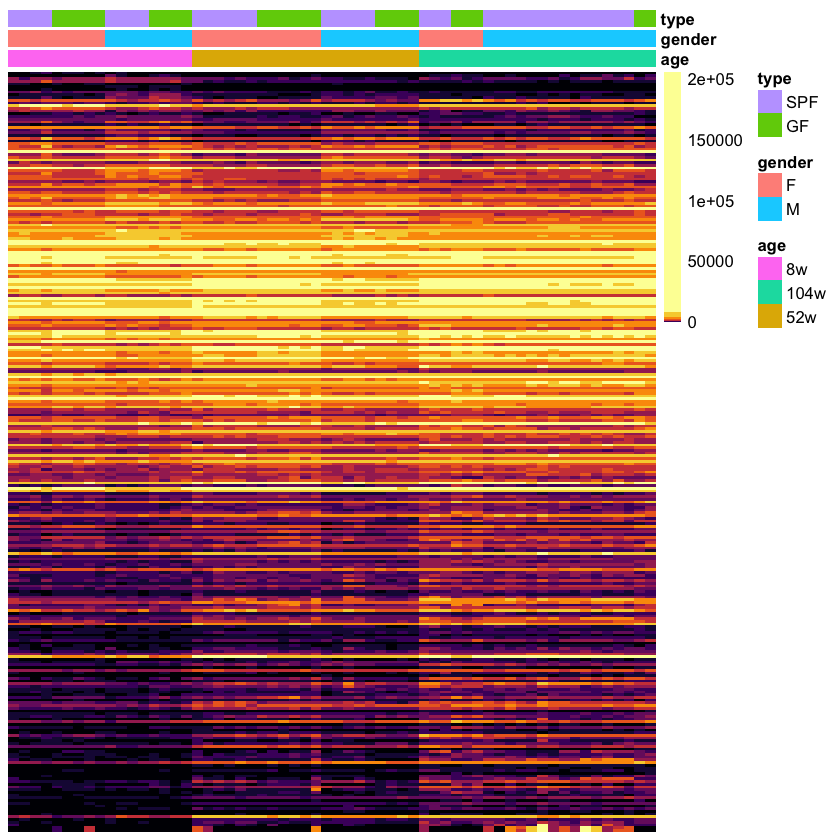

In [25]:
# 52w != 8w and 104w != 8w and 104w != 52w with abs(FC) > 1
genes = names((sort(age_deg$fc_deg[which(abs(age_deg$fc_deg[,1])>0 & abs(age_deg$fc_deg[,2])>0 & abs(age_deg$fc_deg[,3])>0),1])))
plot_count_heatmap(genes,samples, annot)

# DEG into gene co-expression network

- White: up-regulated 
- Black: down-regulated

Order: 52w VS 8w, 104w VS 52w, 104w VS 8w

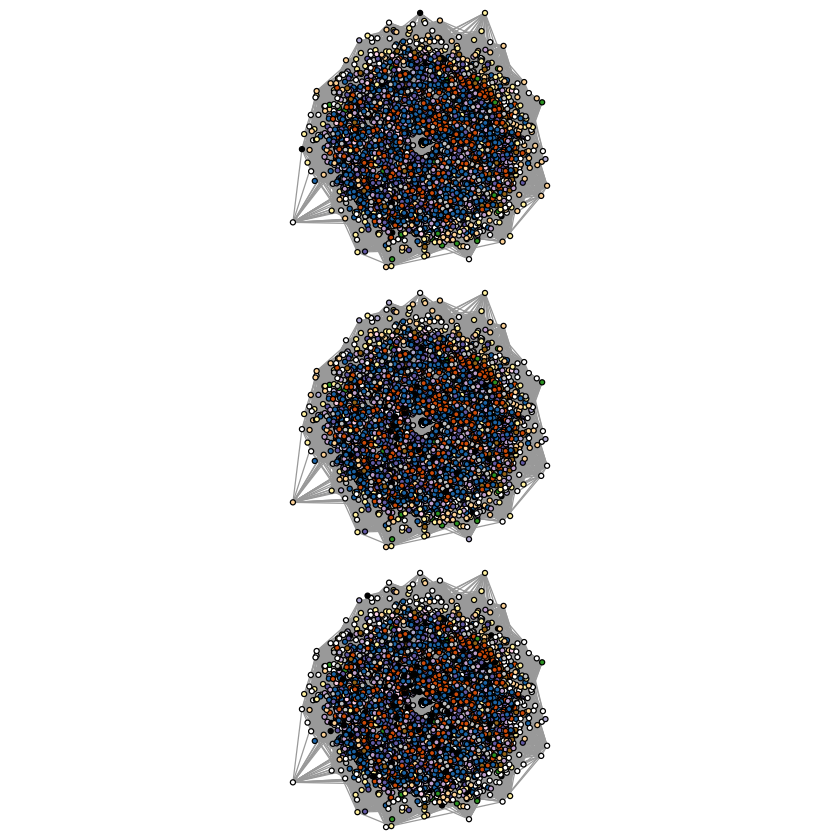

In [26]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
col_52w_vs_8w = get_deg_colors(age_deg, "52w VS 8w", connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_52w_vs_8w, pal2, layout, add_legend = FALSE)
col_104w_vs_52w = get_deg_colors(age_deg, "104w VS 52w", connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_104w_vs_52w, pal2, layout, add_legend = FALSE)
col_104w_vs_8w = get_deg_colors(age_deg, "104w VS 8w", connected_gene_colors, module_nb) 
plot_net_with_layout(net, col_104w_vs_8w, pal2, layout, add_legend = FALSE)

In [27]:
norm_counts_wo_out = counts(dge, normalized=T, replaced = T)
norm_counts_wo_out = norm_counts_wo_out[apply(norm_counts_wo_out, 1, sum) != 0,]
mean_counts = apply(norm_counts_wo_out, 1, mean)
sd_counts = apply(norm_counts_wo_out, 1, sd)
z_scores = (norm_counts_wo_out - mean_counts)/sd_counts
# z_score higher than 3.5 or smaller than -3.5
s = cbind(apply(z_scores > 3.5, 2, sum, na.rm = T), apply(z_scores < -3.5, 2, sum, na.rm = T))
s_perc = 100 * s/dim(norm_counts_wo_out)[1]
apply(s,2,sum)
apply(s_perc,2,min)
apply(s_perc,2,max)

[1] 14447    88

[1] 0.3609066 0.0000000

[1] 4.845773 0.216544

ERROR: Error in colnames(age_gender_deg$deg): object 'age_gender_deg' not found


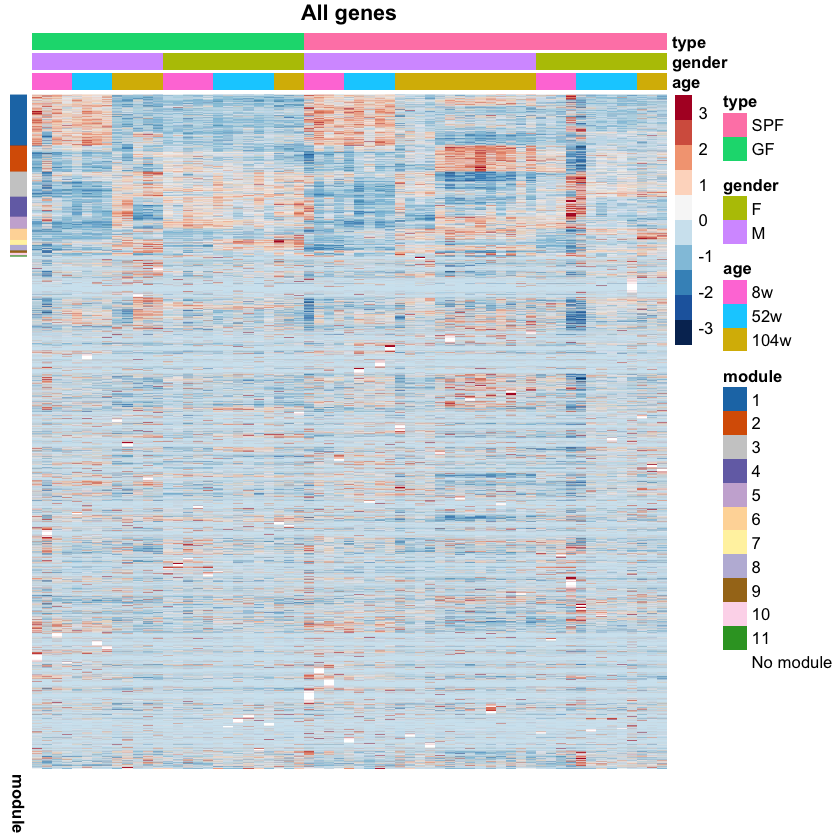

In [29]:
col_order = c(grep("GF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("GF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("GF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("GF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("GF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("GF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("SPF_8w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("SPF_52w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("SPF_104w_M_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("SPF_8w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("SPF_52w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE),
              grep("SPF_104w_F_+", colnames(norm_counts), perl=TRUE, value=TRUE))
annot_col = as.data.frame(colData(dge)[, c("age","gender", "type")])
annot_col$age = factor(annot_col$age,c("8w", "52w", "104w"))

plot_z_score_heatmap_with_modules(z_scores,
                                  rownames(z_scores),
                                  col_order,
                                  annot_col,
                                  "All genes")
for(i in 1:dim(age_deg$deg)[2]){
    plot_z_score_heatmap_with_modules(z_scores,
                                      rownames(age_deg$deg)[age_deg$deg[,i] == 1],
                                      col_order,
                                      annot_col,
                                      paste("DE genes in", colnames(age_gender_deg$deg)[i]))
}

# GO analysis

In [ ]:
full_go_desc = age_deg$GO_wall[[1]][,"term"]
names(full_go_desc) = age_deg$GO_wall[[1]][,"category"]

## Biological process

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(age_deg,
            "BP",
            40)

Network based on description similarity

In [ ]:
BP_network = create_GO_network(age_deg, "BP", BP_GO)

In [ ]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
plot_GO_networks(BP_network, "52w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 52w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(BP_network, "104w VS 8w", full_go_desc, plot_interactive = FALSE)

### 52w VS 8w

In [ ]:
col = get_GO_network_col(BP_network, "52w VS 8w")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age/go/52w_VS_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age/go/52w_VS_8w.png)

GO Tree at "../results/dge/age-effect/age/go/52w_VS_8w.png"

### 104w VS 52w

In [ ]:
col = get_GO_network_col(BP_network, "104w VS 52w")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age/go/104w_VS_52w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age/go/104w_VS_52w.png)

GO Tree at "../results/dge/age-effect/age/go/104w_VS_52w.png"

### 104w VS 8w

In [ ]:
col = get_GO_network_col(BP_network, "104w VS 8w")
dotRes = getAmigoTree(goIDs=names(col),
                      color=col,
                      filename="../results/dge/age-effect/age/go/104w_VS_8w",
                      picType="png",
                      saveResult=TRUE)

![](../results/dge/age-effect/age/go/104w_VS_8w.png)

GO Tree at "../results/dge/age-effect/age/go/104w_VS_8w.png"

## Cellular components

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(age_deg,
            "CC",
            40)

In [ ]:
CC_network = create_GO_network(age_deg, "CC", CC_GO)

In [ ]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
plot_GO_networks(CC_network, "52w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 52w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(CC_network, "104w VS 8w", full_go_desc, plot_interactive = FALSE)

## Molecular functions

Dot-plot with the most over-represented GO (20 most significant p-values for the different comparison)

In [ ]:
plot_top_go(age_deg,
            "MF",
            40)

In [ ]:
MF_network = create_GO_network(age_deg, "MF", MF_GO)

In [ ]:
par(mfrow=c(3,1),mar=c(0,0,0,0))
plot_GO_networks(MF_network, "52w VS 8w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 52w", full_go_desc, plot_interactive = FALSE)
plot_GO_networks(MF_network, "104w VS 8w", full_go_desc, plot_interactive = FALSE)

# KEGG pathways

In [ ]:
plot_kegg_pathways(age_deg$over_represented_KEGG[,"category"],
                   age_deg$fc_deg,
                   "../results/dge/age-effect/age/kegg/over_repr_kegg/")

Pathway graphs available at [../results/dge/age-effect/age/over_repr_kegg/](../results/dge/age-effect/age/over_repr_kegg/)

In [ ]:
plot_kegg_pathways(age_deg$under_represented_KEGG[,"category"],
                   age_deg$fc_deg,
                   "../results/dge/age-effect/age/kegg/under_repr_kegg/")

Pathway graphs available at [../results/dge/age-effect/age/under_repr_kegg/](../results/dge/age-effect/age/under_repr_kegg/)